In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import re

In [7]:
from wordcloud import WordCloud

In [9]:
import zipfile

In [10]:
# path of the zip file loaction
zip_path = r'C:\Users\manoj\OneDrive\Desktop\Inno Machine learning\Project data\NLP project\txt_reviews(1).zip'

In [11]:
with zipfile.ZipFile(zip_path , 'r') as zip_read :
    file_list = zip_read.namelist()
    # extracting the data storage location
    zip_read.extractall('C:/Users/manoj/OneDrive/Desktop/Inno Machine learning/Project data/NLP project/Extracted Data')


#### Extracted data stored in above location

In [12]:
review_read = open(r"C:\Users\manoj\OneDrive\Desktop\Inno Machine learning\Project data\NLP project\Extracted Data\txt_reviews\review_568436.txt", 'r' , encoding = 'utf-8')
review_read.readlines()

['ProductId: B003XUL27E\n',
 'UserId: A2PSB4WQHH46HN\n',
 'ProfileName: carlyowu\n',
 'HelpfulnessNumerator: 0\n',
 'HelpfulnessDenominator: 2\n',
 'Score: 2\n',
 'Time: 1285718400\n',
 "ReviewSummary: Where's the tortellini?\n",
 "ReviewText: It is mostly broth, with the advertised 3/4 cup of vegetables. However, each cup contains about 3 tortellinis. This is supposed to be a double serving bowl, but 1.5 tortellini isn't much of a meal. It tastes good and I like all the veggies (plus it has low sodium) but I really wish they would include a couple more tortellini.\n"]

In [14]:
import os

import pandas as pd

folder_path = "C:/Users/manoj/OneDrive/Desktop/Inno Machine learning/Project data/NLP project/Extracted Data/txt_reviews"

file_names = []
file_contents = []

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path , filename)
        
    with open(file_path , 'r' , encoding = 'utf-8') as file:
        file_name = os.path.splitext(filename)[0]
        content = file.read()
        
        file_names.append(file_name)
        file_contents.append(content)
        
df = pd.DataFrame({'file_names' : file_names , 'file_contents':file_contents})
df.head()

,file_names,file_contents
0,review_1,ProductId: B001E4KFG0\nUserId: A3SGXH7AUHU8GW\...
1,review_10,ProductId: B00171APVA\nUserId: A21BT40VZCCYT4\...
2,review_100,ProductId: B0019CW0HE\nUserId: A2P6ACFZ8FTNVV\...
3,review_1000,ProductId: B006F2NYI2\nUserId: A132DJVI37RB4X\...
4,review_10000,ProductId: B000P41A28\nUserId: A82WIMR4RSVLI\n...


In [15]:
df.shape

(568454, 2)

## Data Stored

In [16]:
df.to_csv('Nlp text Data frame.csv')

In [17]:
import re

## Reading the stored data

In [18]:
df_ = pd.read_csv(r'Nlp text Data frame.csv')
df_

,Unnamed: 0,file_names,file_contents
0,0,review_1,ProductId: B001E4KFG0\nUserId: A3SGXH7AUHU8GW\...
1,1,review_10,ProductId: B00171APVA\nUserId: A21BT40VZCCYT4\...
2,2,review_100,ProductId: B0019CW0HE\nUserId: A2P6ACFZ8FTNVV\...
3,3,review_1000,ProductId: B006F2NYI2\nUserId: A132DJVI37RB4X\...
4,4,review_10000,ProductId: B000P41A28\nUserId: A82WIMR4RSVLI\n...
...,...,...,...
568449,568449,review_99995,ProductId: B000LQORDE\nUserId: AL22WN8RBBOW7\n...
568450,568450,review_99996,ProductId: B000LQORDE\nUserId: A2P7HIRYYWVOBD\...
568451,568451,review_99997,ProductId: B000LQORDE\nUserId: A1K0ZH5MQFBA77\...
568452,568452,review_99998,ProductId: B000LQORDE\nUserId: A29FRN2O7LWINL\...


In [18]:
df_.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [19]:
df_

,Unnamed: 0,file_names,file_contents
0,0,review_1,ProductId: B001E4KFG0\nUserId: A3SGXH7AUHU8GW\...
1,1,review_10,ProductId: B00171APVA\nUserId: A21BT40VZCCYT4\...
2,2,review_100,ProductId: B0019CW0HE\nUserId: A2P6ACFZ8FTNVV\...
3,3,review_1000,ProductId: B006F2NYI2\nUserId: A132DJVI37RB4X\...
4,4,review_10000,ProductId: B000P41A28\nUserId: A82WIMR4RSVLI\n...
...,...,...,...
568449,568449,review_99995,ProductId: B000LQORDE\nUserId: AL22WN8RBBOW7\n...
568450,568450,review_99996,ProductId: B000LQORDE\nUserId: A2P7HIRYYWVOBD\...
568451,568451,review_99997,ProductId: B000LQORDE\nUserId: A1K0ZH5MQFBA77\...
568452,568452,review_99998,ProductId: B000LQORDE\nUserId: A29FRN2O7LWINL\...


In [20]:
df_.shape

(568454, 3)

In [21]:
df_['file_names'][0] 

'review_1'

In [22]:
d1 = df_['file_contents'][0]
d1

'ProductId: B001E4KFG0\nUserId: A3SGXH7AUHU8GW\nProfileName: delmartian\nHelpfulnessNumerator: 1\nHelpfulnessDenominator: 1\nScore: 5\nTime: 1303862400\nReviewSummary: Good Quality Dog Food\nReviewText: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.\n'

In [23]:
re.findall(r"ProductId: (.*)\nUserId:",d1)

['B001E4KFG0']

In [24]:
regex = r"ProductId: (.*)\nUserId:"

In [25]:
regex = r"ProductId: (.*)\nUserId:"
df_['ProductId'] = df_['file_contents'].apply(lambda x: re.findall(regex,x)[0])
df_['ProductId']

0         B001E4KFG0
1         B00171APVA
2         B0019CW0HE
3         B006F2NYI2
4         B000P41A28
             ...    
568449    B000LQORDE
568450    B000LQORDE
568451    B000LQORDE
568452    B000LQORDE
568453    B000LQORDE
Name: ProductId, Length: 568454, dtype: object

In [26]:
reg = r'UserId: (.*)\nProfileName'

In [27]:
df_['UserId'] = df_['file_contents'].apply(lambda x:re.findall(reg, x)[0])
df_['UserId']

0         A3SGXH7AUHU8GW
1         A21BT40VZCCYT4
2         A2P6ACFZ8FTNVV
3         A132DJVI37RB4X
4          A82WIMR4RSVLI
               ...      
568449     AL22WN8RBBOW7
568450    A2P7HIRYYWVOBD
568451    A1K0ZH5MQFBA77
568452    A29FRN2O7LWINL
568453     A9Q950IPXJR1D
Name: UserId, Length: 568454, dtype: object

In [28]:
regex_proname = r'ProfileName: (.*)\nHelpfulnessNumerator:'

In [29]:
df_['ProfileName'] = df_['file_contents'].apply(lambda x:re.findall(regex_proname , x)[0])
df_['ProfileName']

0                      delmartian
1                   Carol A. Reed
2                Melissa Benjamin
3                       Scottdrum
4                      Emrose mom
                   ...           
568449      LifeInTheCity "trogg"
568450                      Mason
568451                 jennilight
568452                    T. Tsai
568453    Lynda "casual customer"
Name: ProfileName, Length: 568454, dtype: object

In [30]:
regex_num = r'HelpfulnessNumerator: (.*)\nHelpfulnessDenominator:'

In [31]:
df_['HelpfulnessNumerator'] = df_['file_contents'].apply(lambda x:re.findall(regex_num , x)[0])
df_['HelpfulnessNumerator']

0         1
1         0
2         0
3         2
4         0
         ..
568449    2
568450    2
568451    2
568452    2
568453    2
Name: HelpfulnessNumerator, Length: 568454, dtype: object

In [32]:
regex_din = r'HelpfulnessDenominator: (.*)\nScore:'

In [33]:
df_['HelpfulnessDenominator'] = df_['file_contents'].apply(lambda x:re.findall(regex_din , x)[0])
df_['HelpfulnessDenominator']

0         1
1         0
2         1
3         5
4         1
         ..
568449    5
568450    5
568451    5
568452    5
568453    5
Name: HelpfulnessDenominator, Length: 568454, dtype: object

In [34]:
regex_sco = r'Score: (.*)\nTime:'

In [35]:
df_['Score'] = df_['file_contents'].apply(lambda x:re.findall(regex_sco , x)[0])
df_['Score']

0         5
1         5
2         1
3         2
4         4
         ..
568449    5
568450    5
568451    4
568452    5
568453    4
Name: Score, Length: 568454, dtype: object

In [36]:
regex_t = r'Time: (.*)\nReviewSummary:'

In [37]:
df_['Time'] = df_['file_contents'].apply(lambda x:re.findall(regex_t,x)[0])
df_['Time']

0         1303862400
1         1351209600
2         1331164800
3         1332374400
4         1337472000
             ...    
568449    1256428800
568450    1254096000
568451    1250985600
568452    1237766400
568453    1237161600
Name: Time, Length: 568454, dtype: object

In [38]:
regex_s = r'ReviewSummary: (.*)\nReviewText:'

In [39]:
df_['ReviewSummary'] = df_['file_contents'].apply(lambda x:re.findall(regex_s,x)[0])
df_['ReviewSummary']

0              Good Quality Dog Food
1                   Healthy Dog Food
2                                Bad
3              Not hot, not habanero
4         The best weve tried so far
                     ...            
568449                    Good Stuff
568450                        yummy!
568451             Tastes like More!
568452                   Great ramen
568453                       Spicy!!
Name: ReviewSummary, Length: 568454, dtype: object

In [40]:
regex_rt = r'ReviewText: (.*)\n'

In [41]:
df_['ReviewText'] = df_['file_contents'].apply(lambda x:re.findall(regex_rt , x)[0])
df_['ReviewText']

0         I have bought several of the Vitality canned d...
1         This is a very healthy dog food. Good for thei...
2         I fed this to my Golden Retriever and he hated...
3         I have to admit, I was a sucker for the large ...
4         We have a 7 week old... He had gas and constip...
                                ...                        
568449    I love these noodle.  A little to spicy for th...
568450    I just love it and will buy another box when I...
568451    My late father in law used to have a rating sy...
568452    This is my favorite brand of Korean ramen. It ...
568453    I do like these noodles although, to say they ...
Name: ReviewText, Length: 568454, dtype: object

In [42]:
# df_['Hopefullness'] = df_['HelpfulnessNumerator'] / df_['HelpfulnessDenominator']

In [43]:
data_dict = {'Id':[i for i in range(1,len(df_)+1)],
    'ProductId':df_['ProductId'],
          'UserId':df_['UserId'],
            'ProfileName' : df_['ProfileName'] ,
          'HelpfulnessNumerator':df_['HelpfulnessNumerator'],
           'HelpfulnessDenominator':df_['HelpfulnessDenominator'],
#              'Hopefullness':df_['Hopefullness'],
           'Time':df_['Time'],
            'Score' : df_['Score'],
           'ReviewSummary':df_['ReviewSummary'],
           'ReviewText':df_['ReviewText']
           
          }

In [44]:
data_df = pd.DataFrame(data_dict)

## Text data Data Frame

In [45]:
data_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1351209600,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1331164800,1,Bad,I fed this to my Golden Retriever and he hated...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,1332374400,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,1337472000,4,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,1256428800,5,Good Stuff,I love these noodle. A little to spicy for th...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,1254096000,5,yummy!,I just love it and will buy another box when I...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,1250985600,4,Tastes like More!,My late father in law used to have a rating sy...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,1237766400,5,Great ramen,This is my favorite brand of Korean ramen. It ...


In [46]:
data_df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator      object
HelpfulnessDenominator    object
Time                      object
Score                     object
ReviewSummary             object
ReviewText                object
dtype: object

### Data Type Changing

In [47]:
data_df['HelpfulnessNumerator'] = data_df['HelpfulnessNumerator'].astype('int')

In [48]:
data_df['HelpfulnessDenominator'] = data_df['HelpfulnessDenominator'].astype('int')

In [49]:
data_df['Time'] = data_df['Time'].astype('int')

In [50]:
data_df['Score'] = data_df['Score'].astype('int')

### type conversion

In [51]:

from datetime import datetime

data_df['Time'] = data_df['Time'].apply(lambda x: datetime.fromtimestamp(x).isoformat())

data_df['Time'] = data_df['Time'].apply(lambda x: ''.join(re.findall('(.*)T',x)))

data_df['Time'] #= pd.to_datetime(data_df['Time'])


0         2011-04-27
1         2012-10-26
2         2012-03-08
3         2012-03-22
4         2012-05-20
             ...    
568449    2009-10-25
568450    2009-09-28
568451    2009-08-23
568452    2009-03-23
568453    2009-03-16
Name: Time, Length: 568454, dtype: object

In [52]:

data_df['Time'] = pd.to_datetime(data_df['Time'])

In [53]:
data_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,2011-04-27,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,2012-10-26,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,2012-03-08,1,Bad,I fed this to my Golden Retriever and he hated...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2012-03-22,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,2012-05-20,4,The best weve tried so far,We have a 7 week old... He had gas and constip...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,2009-10-25,5,Good Stuff,I love these noodle. A little to spicy for th...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,2009-09-28,5,yummy!,I just love it and will buy another box when I...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,2009-08-23,4,Tastes like More!,My late father in law used to have a rating sy...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,2009-03-23,5,Great ramen,This is my favorite brand of Korean ramen. It ...


In [54]:
data_df.dtypes

Id                                 int64
ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int32
HelpfulnessDenominator             int32
Time                      datetime64[ns]
Score                              int32
ReviewSummary                     object
ReviewText                        object
dtype: object

### Adding new columns to data frame as 'Helpfullness' = HelpfulnessNumerator/HelpfulnessDenominator

In [55]:
data_df['Helpfulness'] = np.round((data_df['HelpfulnessNumerator']/data_df['HelpfulnessDenominator']),1)

data_df['Helpfulness'] = data_df['Helpfulness'].fillna(0)


In [56]:
data_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score,ReviewSummary,ReviewText,Helpfulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,2011-04-27,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,2012-10-26,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,2012-03-08,1,Bad,I fed this to my Golden Retriever and he hated...,0.0
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2012-03-22,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,2012-05-20,4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,2009-10-25,5,Good Stuff,I love these noodle. A little to spicy for th...,0.4
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,2009-09-28,5,yummy!,I just love it and will buy another box when I...,0.4
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,2009-08-23,4,Tastes like More!,My late father in law used to have a rating sy...,0.4
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,2009-03-23,5,Great ramen,This is my favorite brand of Korean ramen. It ...,0.4


### Storing Text Data  into csv file

In [57]:
data_df.to_csv('Nlp Project Data frame.csv')

### Reading Stored Data 

In [8]:
data = pd.read_csv(r'Nlp Project Data frame.csv')

In [9]:
data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score,ReviewSummary,ReviewText,Helpfulness
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,2011-04-27,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,2012-10-26,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0
2,2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,2012-03-08,1,Bad,I fed this to my Golden Retriever and he hated...,0.0
3,3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2012-03-22,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4
4,4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,2012-05-20,4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0


In [10]:
data['review of summary and Text'] = data['ReviewSummary']+ data['ReviewText']

In [11]:
data.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [12]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score,ReviewSummary,ReviewText,Helpfulness,review of summary and Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,2011-04-27,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,Good Quality Dog FoodI have bought several of ...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,2012-10-26,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0,Healthy Dog FoodThis is a very healthy dog foo...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,2012-03-08,1,Bad,I fed this to my Golden Retriever and he hated...,0.0,BadI fed this to my Golden Retriever and he ha...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2012-03-22,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4,"Not hot, not habaneroI have to admit, I was a ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,2012-05-20,4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0,The best weve tried so farWe have a 7 week old...
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,2009-10-25,5,Good Stuff,I love these noodle. A little to spicy for th...,0.4,Good StuffI love these noodle. A little to sp...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,2009-09-28,5,yummy!,I just love it and will buy another box when I...,0.4,yummy!I just love it and will buy another box ...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,2009-08-23,4,Tastes like More!,My late father in law used to have a rating sy...,0.4,Tastes like More!My late father in law used to...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,2009-03-23,5,Great ramen,This is my favorite brand of Korean ramen. It ...,0.4,Great ramenThis is my favorite brand of Korean...


In [13]:
data.shape

(568454, 12)

In [14]:
data.dtypes

Id                              int64
ProductId                      object
UserId                         object
ProfileName                    object
HelpfulnessNumerator            int64
HelpfulnessDenominator          int64
Time                           object
Score                           int64
ReviewSummary                  object
ReviewText                     object
Helpfulness                   float64
review of summary and Text     object
dtype: object

## Data Cleaning

In [15]:
data.info

<bound method DataFrame.info of             Id   ProductId          UserId              ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW               delmartian   
1            2  B00171APVA  A21BT40VZCCYT4            Carol A. Reed   
2            3  B0019CW0HE  A2P6ACFZ8FTNVV         Melissa Benjamin   
3            4  B006F2NYI2  A132DJVI37RB4X                Scottdrum   
4            5  B000P41A28   A82WIMR4RSVLI               Emrose mom   
...        ...         ...             ...                      ...   
568449  568450  B000LQORDE   AL22WN8RBBOW7    LifeInTheCity "trogg"   
568450  568451  B000LQORDE  A2P7HIRYYWVOBD                    Mason   
568451  568452  B000LQORDE  A1K0ZH5MQFBA77               jennilight   
568452  568453  B000LQORDE  A29FRN2O7LWINL                  T. Tsai   
568453  568454  B000LQORDE   A9Q950IPXJR1D  Lynda "casual customer"   

        HelpfulnessNumerator  HelpfulnessDenominator        Time  Score  \
0                          1            

#### Checking for dublicated values

In [16]:
data.duplicated().value_counts()

False    568454
dtype: int64

##### Droping the duplcated values from the data set if they prasent

In [17]:
# data.drop_duplicates(inplace = True)

In [18]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score,ReviewSummary,ReviewText,Helpfulness,review of summary and Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,2011-04-27,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,Good Quality Dog FoodI have bought several of ...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,2012-10-26,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0,Healthy Dog FoodThis is a very healthy dog foo...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,2012-03-08,1,Bad,I fed this to my Golden Retriever and he hated...,0.0,BadI fed this to my Golden Retriever and he ha...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2012-03-22,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4,"Not hot, not habaneroI have to admit, I was a ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,2012-05-20,4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0,The best weve tried so farWe have a 7 week old...
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,2009-10-25,5,Good Stuff,I love these noodle. A little to spicy for th...,0.4,Good StuffI love these noodle. A little to sp...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,2009-09-28,5,yummy!,I just love it and will buy another box when I...,0.4,yummy!I just love it and will buy another box ...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,2009-08-23,4,Tastes like More!,My late father in law used to have a rating sy...,0.4,Tastes like More!My late father in law used to...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,2009-03-23,5,Great ramen,This is my favorite brand of Korean ramen. It ...,0.4,Great ramenThis is my favorite brand of Korean...


In [19]:
data.dtypes

Id                              int64
ProductId                      object
UserId                         object
ProfileName                    object
HelpfulnessNumerator            int64
HelpfulnessDenominator          int64
Time                           object
Score                           int64
ReviewSummary                  object
ReviewText                     object
Helpfulness                   float64
review of summary and Text     object
dtype: object

#### Checking for nan values

In [20]:
data.isna().sum()

Id                             0
ProductId                      0
UserId                         0
ProfileName                   16
HelpfulnessNumerator           0
HelpfulnessDenominator         0
Time                           0
Score                          0
ReviewSummary                 27
ReviewText                     0
Helpfulness                    0
review of summary and Text    27
dtype: int64

In [21]:
np.round(data.isna().sum()/data.shape[0]*100,3)

Id                            0.000
ProductId                     0.000
UserId                        0.000
ProfileName                   0.003
HelpfulnessNumerator          0.000
HelpfulnessDenominator        0.000
Time                          0.000
Score                         0.000
ReviewSummary                 0.005
ReviewText                    0.000
Helpfulness                   0.000
review of summary and Text    0.005
dtype: float64

#### Nan values were filling with if column is numerical filling with median and if column is catogorical filling with mode

In [22]:
data['ReviewSummary'] = data['ReviewSummary'].fillna(data['ReviewSummary'].mode()[0])

In [23]:
data['ProfileName'] = data['ProfileName'].fillna(data['ProfileName'].mode()[0])

In [24]:
data.isna().sum()

Id                             0
ProductId                      0
UserId                         0
ProfileName                    0
HelpfulnessNumerator           0
HelpfulnessDenominator         0
Time                           0
Score                          0
ReviewSummary                  0
ReviewText                     0
Helpfulness                    0
review of summary and Text    27
dtype: int64

In [25]:
data.dropna( inplace=True)

In [26]:
data.isna().sum()

Id                            0
ProductId                     0
UserId                        0
ProfileName                   0
HelpfulnessNumerator          0
HelpfulnessDenominator        0
Time                          0
Score                         0
ReviewSummary                 0
ReviewText                    0
Helpfulness                   0
review of summary and Text    0
dtype: int64

In [27]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score,ReviewSummary,ReviewText,Helpfulness,review of summary and Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,2011-04-27,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,Good Quality Dog FoodI have bought several of ...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,2012-10-26,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0,Healthy Dog FoodThis is a very healthy dog foo...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,2012-03-08,1,Bad,I fed this to my Golden Retriever and he hated...,0.0,BadI fed this to my Golden Retriever and he ha...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2012-03-22,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4,"Not hot, not habaneroI have to admit, I was a ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,2012-05-20,4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0,The best weve tried so farWe have a 7 week old...
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,2009-10-25,5,Good Stuff,I love these noodle. A little to spicy for th...,0.4,Good StuffI love these noodle. A little to sp...
568450,568451,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,2009-09-28,5,yummy!,I just love it and will buy another box when I...,0.4,yummy!I just love it and will buy another box ...
568451,568452,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,2009-08-23,4,Tastes like More!,My late father in law used to have a rating sy...,0.4,Tastes like More!My late father in law used to...
568452,568453,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,2009-03-23,5,Great ramen,This is my favorite brand of Korean ramen. It ...,0.4,Great ramenThis is my favorite brand of Korean...


In [28]:
data.shape

(568427, 12)

### Removing columns which are un-wanted for text analysis

In [29]:
final_df = data.drop(['ProfileName' ,'HelpfulnessNumerator', 'HelpfulnessDenominator','Time','ProductId' ,'UserId'] , axis = 1) 

In [30]:
final_df

,Id,Score,ReviewSummary,ReviewText,Helpfulness,review of summary and Text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,Good Quality Dog FoodI have bought several of ...
1,2,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0,Healthy Dog FoodThis is a very healthy dog foo...
2,3,1,Bad,I fed this to my Golden Retriever and he hated...,0.0,BadI fed this to my Golden Retriever and he ha...
3,4,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4,"Not hot, not habaneroI have to admit, I was a ..."
4,5,4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0,The best weve tried so farWe have a 7 week old...
...,...,...,...,...,...,...
568449,568450,5,Good Stuff,I love these noodle. A little to spicy for th...,0.4,Good StuffI love these noodle. A little to sp...
568450,568451,5,yummy!,I just love it and will buy another box when I...,0.4,yummy!I just love it and will buy another box ...
568451,568452,4,Tastes like More!,My late father in law used to have a rating sy...,0.4,Tastes like More!My late father in law used to...
568452,568453,5,Great ramen,This is my favorite brand of Korean ramen. It ...,0.4,Great ramenThis is my favorite brand of Korean...


## Word cloud on Review Text 

In [31]:
data['review of summary and Text']

0         Good Quality Dog FoodI have bought several of ...
1         Healthy Dog FoodThis is a very healthy dog foo...
2         BadI fed this to my Golden Retriever and he ha...
3         Not hot, not habaneroI have to admit, I was a ...
4         The best weve tried so farWe have a 7 week old...
                                ...                        
568449    Good StuffI love these noodle.  A little to sp...
568450    yummy!I just love it and will buy another box ...
568451    Tastes like More!My late father in law used to...
568452    Great ramenThis is my favorite brand of Korean...
568453    Spicy!!I do like these noodles although, to sa...
Name: review of summary and Text, Length: 568427, dtype: object

In [33]:
text_batch = ' '.join(data['review of summary and Text'])


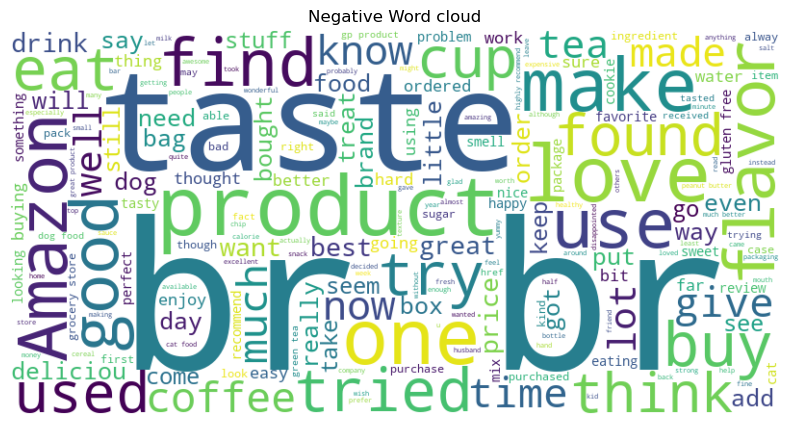

In [34]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_batch)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Word cloud')
plt.axis('off')
plt.show()

In [35]:
final_df['Score'].unique()

array([5, 1, 2, 4, 3], dtype=int64)

In [36]:
np.round(final_df['Score'].value_counts()/final_df.shape[0]*100 , 2)

5    63.88
4    14.19
1     9.20
3     7.50
2     5.23
Name: Score, dtype: float64

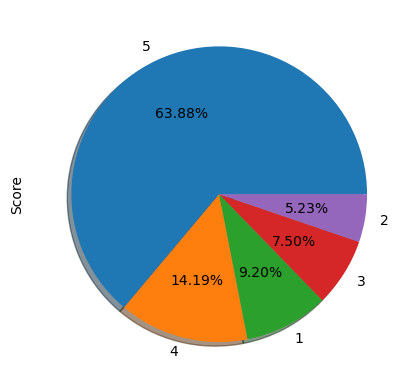

In [37]:
np.round(final_df['Score'].value_counts()/final_df.shape[0]*100 , 2).plot(kind = 'pie' , 
                                                                          autopct = '%0.2F%%',shadow = True)
plt.show()

In [38]:
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word

In [39]:
stemmer = PorterStemmer()
# stemmer is used to convert all the words into singular3

In [40]:
lemmatizer = WordNetLemmatizer()
#lematizer is used to convert all the words into meaning full english words

In [41]:
def clean_text(doc, stem=False):
    # Removing Special Characters
    doc = re.sub(r'[^A-z0-9 ]','',doc)
    doc = re.sub(r'_','',doc)
    # Convert to Lowercase
    doc = doc.lower()
    # Split the document into tokens
    doc_list = doc.split()
    # Correct the Spellings and removing stop words
    doc_list = [word for word in doc_list if word not in stopwords.words('english')]
    #doc_list = [str(TextBlob(word).correct()) for word in doc_list if word not in sw]
    # Convert to Singularize
    #doc_list = [str(Word(word).singularize()) for word in doc_list]
    
    return " ".join(doc_list)

In [42]:
from tqdm import tqdm, tqdm_notebook

In [43]:
tqdm.pandas()

In [44]:
final_df['Review Text & Summary Lemma'] = final_df['review of summary and Text'].progress_apply(clean_text)

100%|████████████████████████████████████████████████████████████████████████| 568427/568427 [3:46:21<00:00, 41.85it/s]


In [45]:
final_df['Review Text & Summary Lemma']

0         good quality dog foodi bought several vitality...
1         healthy dog foodthis healthy dog food good dig...
2         badi fed golden retriever hated wouldnt eat ga...
3         hot habaneroi admit sucker large quantity 12 o...
4         best weve tried farwe 7 week old gas constipat...
                                ...                        
568449     good stuffi love noodle little spicy wife perfct
568450         yummyi love buy another box im done last one
568451    tastes like moremy late father law used rating...
568452    great ramenthis favorite brand korean ramen sp...
568453    spicyi like noodles although say spicy somewha...
Name: Review Text & Summary Lemma, Length: 568427, dtype: object

### Clean_text review 

In [46]:
final_df

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,Id,Score,ReviewSummary,ReviewText,Helpfulness,review of summary and Text,Review Text & Summary Lemma
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,Good Quality Dog FoodI have bought several of ...,good quality dog foodi bought several vitality...
1,2,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0,Healthy Dog FoodThis is a very healthy dog foo...,healthy dog foodthis healthy dog food good dig...
2,3,1,Bad,I fed this to my Golden Retriever and he hated...,0.0,BadI fed this to my Golden Retriever and he ha...,badi fed golden retriever hated wouldnt eat ga...
3,4,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4,"Not hot, not habaneroI have to admit, I was a ...",hot habaneroi admit sucker large quantity 12 o...
4,5,4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0,The best weve tried so farWe have a 7 week old...,best weve tried farwe 7 week old gas constipat...
...,...,...,...,...,...,...,...
568449,568450,5,Good Stuff,I love these noodle. A little to spicy for th...,0.4,Good StuffI love these noodle. A little to sp...,good stuffi love noodle little spicy wife perfct
568450,568451,5,yummy!,I just love it and will buy another box when I...,0.4,yummy!I just love it and will buy another box ...,yummyi love buy another box im done last one
568451,568452,4,Tastes like More!,My late father in law used to have a rating sy...,0.4,Tastes like More!My late father in law used to...,tastes like moremy late father law used rating...
568452,568453,5,Great ramen,This is my favorite brand of Korean ramen. It ...,0.4,Great ramenThis is my favorite brand of Korean...,great ramenthis favorite brand korean ramen sp...


In [47]:
final_df.to_csv('Final df text data after tqdm.csv')

### Train test split of data frame

##### Data splited into 80/20 ratio

In [48]:
text_data = pd.read_csv('Final df text data after tqdm.csv')

In [49]:
text_data

,Unnamed: 0,Id,Score,ReviewSummary,ReviewText,Helpfulness,review of summary and Text,Review Text & Summary Lemma
0,0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,Good Quality Dog FoodI have bought several of ...,good quality dog foodi bought several vitality...
1,1,2,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0,Healthy Dog FoodThis is a very healthy dog foo...,healthy dog foodthis healthy dog food good dig...
2,2,3,1,Bad,I fed this to my Golden Retriever and he hated...,0.0,BadI fed this to my Golden Retriever and he ha...,badi fed golden retriever hated wouldnt eat ga...
3,3,4,2,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4,"Not hot, not habaneroI have to admit, I was a ...",hot habaneroi admit sucker large quantity 12 o...
4,4,5,4,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0,The best weve tried so farWe have a 7 week old...,best weve tried farwe 7 week old gas constipat...
...,...,...,...,...,...,...,...,...
568422,568449,568450,5,Good Stuff,I love these noodle. A little to spicy for th...,0.4,Good StuffI love these noodle. A little to sp...,good stuffi love noodle little spicy wife perfct
568423,568450,568451,5,yummy!,I just love it and will buy another box when I...,0.4,yummy!I just love it and will buy another box ...,yummyi love buy another box im done last one
568424,568451,568452,4,Tastes like More!,My late father in law used to have a rating sy...,0.4,Tastes like More!My late father in law used to...,tastes like moremy late father law used rating...
568425,568452,568453,5,Great ramen,This is my favorite brand of Korean ramen. It ...,0.4,Great ramenThis is my favorite brand of Korean...,great ramenthis favorite brand korean ramen sp...


In [50]:
text_data.drop(['Unnamed: 0' , 'ReviewSummary' , 'ReviewText'] , axis = 1 , inplace = True)

In [51]:
text_data

,Id,Score,Helpfulness,review of summary and Text,Review Text & Summary Lemma
0,1,5,1.0,Good Quality Dog FoodI have bought several of ...,good quality dog foodi bought several vitality...
1,2,5,0.0,Healthy Dog FoodThis is a very healthy dog foo...,healthy dog foodthis healthy dog food good dig...
2,3,1,0.0,BadI fed this to my Golden Retriever and he ha...,badi fed golden retriever hated wouldnt eat ga...
3,4,2,0.4,"Not hot, not habaneroI have to admit, I was a ...",hot habaneroi admit sucker large quantity 12 o...
4,5,4,0.0,The best weve tried so farWe have a 7 week old...,best weve tried farwe 7 week old gas constipat...
...,...,...,...,...,...
568422,568450,5,0.4,Good StuffI love these noodle. A little to sp...,good stuffi love noodle little spicy wife perfct
568423,568451,5,0.4,yummy!I just love it and will buy another box ...,yummyi love buy another box im done last one
568424,568452,4,0.4,Tastes like More!My late father in law used to...,tastes like moremy late father law used rating...
568425,568453,5,0.4,Great ramenThis is my favorite brand of Korean...,great ramenthis favorite brand korean ramen sp...


## Word cloud on processed data

In [52]:
text_batch_tqdm = ' '.join(text_data['Review Text & Summary Lemma'])

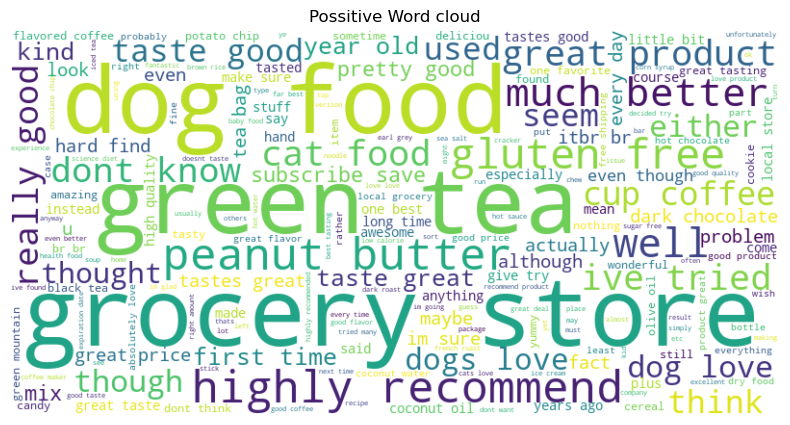

In [54]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_batch_tqdm)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Possitive Word cloud')
plt.axis('off')
plt.show()

In [55]:
text_data['Score'].value_counts()

5    363122
4     80655
1     52268
3     42638
2     29744
Name: Score, dtype: int64

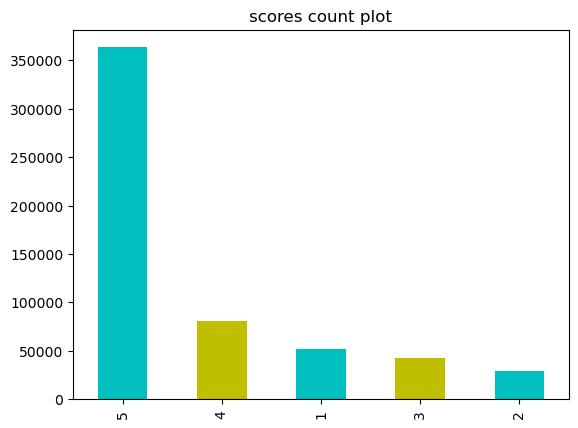

In [56]:
text_data['Score'].value_counts().plot(kind = 'bar' , color = ['c','y'])
plt.title('scores count plot')
plt.show()

In [57]:
text_data['Helpfulness'].value_counts()

0.0    303963
1.0    185035
0.5     22272
0.8     14955
0.7     12858
0.9      9207
0.3      6366
0.2      4680
0.6      4245
0.4      3054
0.1      1790
1.5         1
3.0         1
Name: Helpfulness, dtype: int64

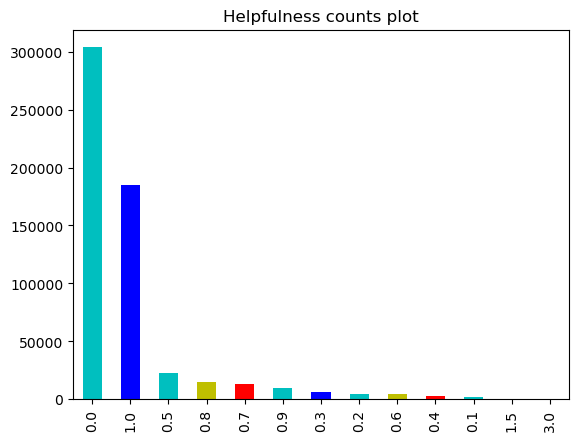

In [58]:
text_data['Helpfulness'].value_counts().plot(kind = 'bar' , color = ['c' , 'b' , 'c' , 'y' , 'r'])
plt.title('Helpfulness counts plot')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train , X_test , Y_train,Y_test = train_test_split(text_data['Review Text & Summary Lemma'] , text_data['Score'] ,train_size=0.8,random_state=7)

In [61]:
len(X_train)

454741

In [62]:
len(X_test)

113686

In [63]:
len(Y_train)

454741

In [64]:
len(Y_test)

113686

## Using Bag of words (Bow)

In [65]:
##Count vectorizer  is convert data into numerical base frequency

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
bow_model = CountVectorizer(min_df = 1)

In [68]:
x_train_bow_model = bow_model.fit_transform(X_train)

In [69]:
x_train_bow_model

<454741x310908 sparse matrix of type '<class 'numpy.int64'>'
	with 16704204 stored elements in Compressed Sparse Row format>

In [70]:
from sys import getsizeof

In [71]:
getsizeof(x_train_bow_model)

48

In [72]:
# If working with nlp data set_config to default
# Do not convert sparse matrix to DataFrame
# Try to use pipelines
from sklearn import set_config
set_config(transform_output='default')
getsizeof(pd.DataFrame(x_train_bow_model))

18189784

In [73]:
x_test_bow_model = bow_model.transform(X_test)

In [74]:
print("Shape of x_train_bow_model:", x_train_bow_model.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of x_train_bow_model: (454741, 310908)
Shape of Y_test: (113686,)


## Model Building

### importing metrics

In [77]:
from sklearn.metrics import  accuracy_score

In [78]:
from sklearn.metrics import confusion_matrix

### MultinomialNB algorithm using Bag of Words (Bow)

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [81]:
mnb = MultinomialNB()

In [82]:
%%time
mnb.fit(x_train_bow_model , Y_train)

Wall time: 408 ms


MultinomialNB()

In [83]:
y_pred_mnb = mnb.predict(x_test_bow_model)

In [84]:
y_pred_mnb

array([1, 5, 4, ..., 5, 1, 5], dtype=int64)

In [85]:
ypredd_df = pd.DataFrame({'real':Y_test , 'predicted' : y_pred_mnb})

In [86]:
ypredd_df

,real,predicted
238235,2,1
366377,5,5
404185,4,4
36771,5,4
426175,5,5
...,...,...
400265,5,5
396130,4,5
420200,5,5
282512,1,1


In [87]:
accuracy_score(y_pred_mnb,Y_test)

0.7491247822950935

In [222]:
Multinomialnb_accurecy_score = accuracy_score(Y_test,y_pred_mnb)

In [224]:


Multinomialnb_accurecy_score

0.7491247822950935

In [90]:
cm_mnb = confusion_matrix(Y_test , y_pred_mnb)

In [91]:
cm_mnb

array([[ 7150,   266,   494,   540,  2033],
       [ 1360,  1068,   796,   892,  1798],
       [  924,   109,  2577,  2101,  2768],
       [  478,    28,   399,  6541,  8595],
       [  976,    64,   298,  3602, 67829]], dtype=int64)

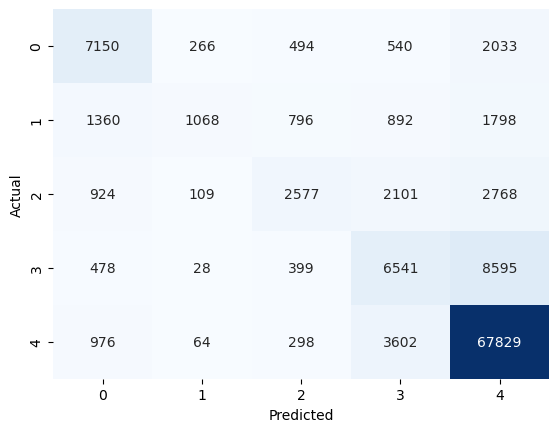

In [92]:
sns.heatmap(cm_mnb ,annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [93]:
pd.crosstab(Y_test, y_pred_mnb, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,2,3,4,5
Actual,,,,,
1,7150,266,494,540,2033
2,1360,1068,796,892,1798
3,924,109,2577,2101,2768
4,478,28,399,6541,8595
5,976,64,298,3602,67829


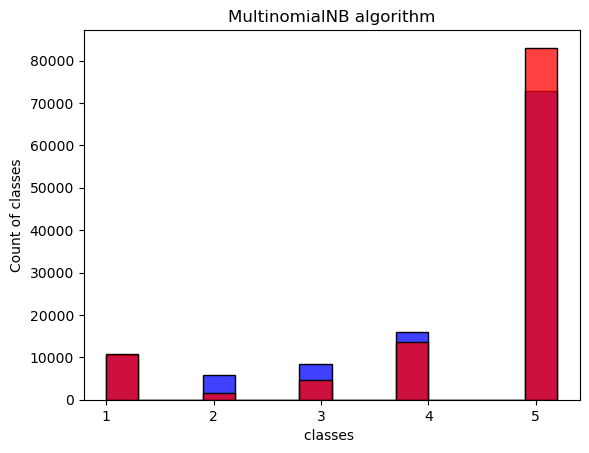

In [94]:
sns.histplot(Y_test,color='blue' , binwidth = 0.3)
sns.histplot(y_pred_mnb,color='red' , binwidth = 0.3)
plt.ylabel('Count of classes')
plt.xlabel('classes ')
plt.title('MultinomialNB algorithm')
plt.show()

### Decision Tree classifier

In [95]:

from sklearn.tree import DecisionTreeClassifier

In [96]:
%%time

dtcf = DecisionTreeClassifier()
dtcf.fit(x_train_bow_model , Y_train)

Wall time: 1h 35min 1s


DecisionTreeClassifier()

In [176]:
dtc_pred = dtcf.predict(x_test_bow_model)

In [177]:
dtc_pred

array([1, 5, 4, ..., 5, 1, 5], dtype=int64)

In [178]:
accuracy_score(dtc_pred , Y_test)

0.7648874971412487

In [225]:
Decision_tree_accurecy_score = accuracy_score(dtc_pred , Y_test)

In [226]:
Decision_tree_accurecy_score

0.7648874971412487

In [190]:
dtc_pred_df = pd.DataFrame({'predicted':dtc_pred,'Actuall':Y_test})

In [191]:
dtc_pred_df

,predicted,Actuall
238235,1,2
366377,5,5
404185,4,4
36771,5,5
426175,5,5
...,...,...
400265,5,5
396130,5,4
420200,5,5
282512,1,1


In [192]:
con_max_dt = confusion_matrix(Y_test,dtc_pred)
con_max_dt

array([[ 6779,   651,   549,   511,  1993],
       [  853,  2701,   499,   496,  1365],
       [  702,   502,  4106,  1003,  2166],
       [  573,   383,   837,  8369,  5879],
       [ 1546,   841,  1349,  4031, 65002]], dtype=int64)

In [193]:
pd.crosstab(Y_test , dtc_pred , rownames=['Actuall'] , colnames=['predicted'])

predicted,1,2,3,4,5
Actuall,,,,,
1,6779,651,549,511,1993
2,853,2701,499,496,1365
3,702,502,4106,1003,2166
4,573,383,837,8369,5879
5,1546,841,1349,4031,65002


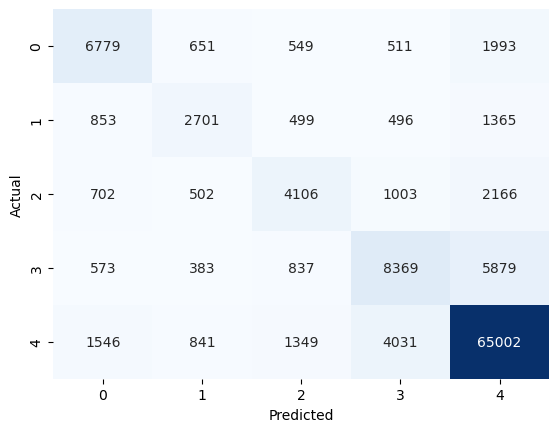

In [194]:
sns.heatmap(con_max_dt ,annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

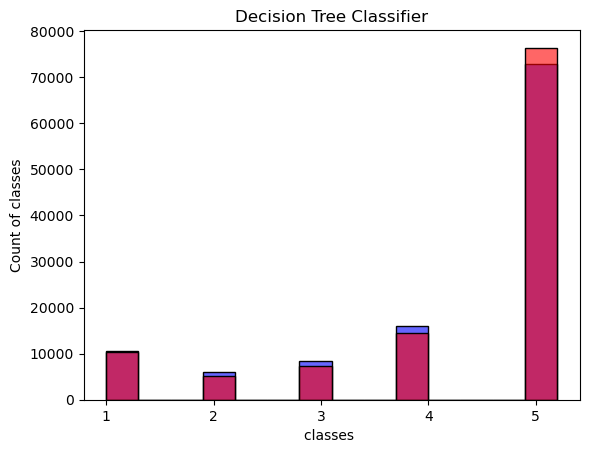

In [330]:

sns.histplot(Y_test,color='blue',alpha=0.6,binwidth = 0.3)
sns.histplot(dtc_pred,color='red',alpha=0.6,binwidth = 0.3)
plt.ylabel('Count of classes')
plt.xlabel('classes ')
plt.title('Decision Tree Classifier')
plt.show()

## Logistic regression

In [196]:
from sklearn.linear_model import LogisticRegression


In [197]:
%%time

lr = LogisticRegression()

lr.fit(x_train_bow_model , Y_train)

Wall time: 1min 16s


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [198]:
import pickle

In [199]:
lr_pred = lr.predict(x_test_bow_model)

In [200]:
lr_pred

array([1, 5, 4, ..., 5, 1, 5], dtype=int64)

In [202]:
accuracy_score(lr_pred , Y_test)

0.7708424959977482

In [227]:
Logistic_regression_accurecy_score = (accuracy_score(lr_pred , Y_test))

In [228]:
Logistic_regression_accurecy_score

0.7708424959977482

In [205]:
confusion_matrix(lr_pred , Y_test)

array([[ 7622,  1403,   794,   338,   654],
       [  880,  2158,   766,   246,   286],
       [  437,   810,  3396,  1015,   582],
       [  208,   355,  1221,  5656,  2445],
       [ 1336,  1188,  2302,  8786, 68802]], dtype=int64)

In [206]:
pd.crosstab(lr_pred , Y_test , rownames=['predicted'] , colnames=['Actuall'])

Actuall,1,2,3,4,5
predicted,,,,,
1,7622,1403,794,338,654
2,880,2158,766,246,286
3,437,810,3396,1015,582
4,208,355,1221,5656,2445
5,1336,1188,2302,8786,68802


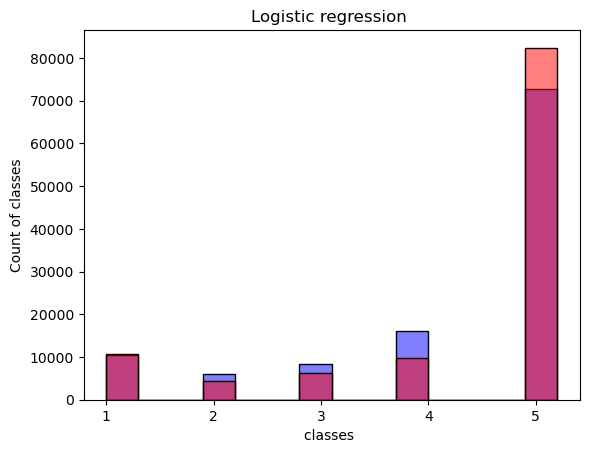

In [329]:
sns.histplot(Y_test,color='blue',alpha=0.5 , binwidth = 0.3)
sns.histplot(lr_pred,color='red',alpha=0.5,binwidth = 0.3)
plt.ylabel('Count of classes')
plt.xlabel('classes ')
plt.title('Logistic regression ')
plt.show()

In [209]:
con_max = confusion_matrix(lr_pred , Y_test)

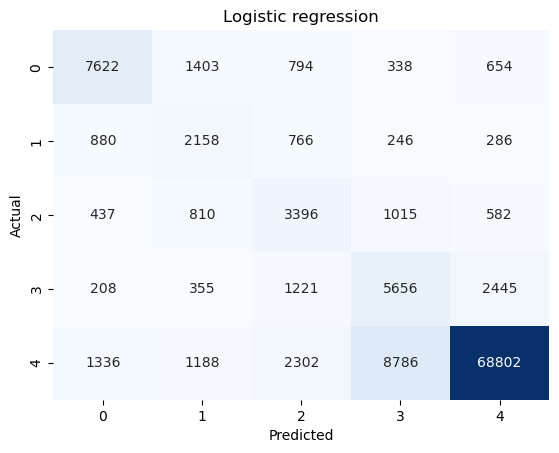

In [210]:
sns.heatmap(con_max ,annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Logistic regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [229]:
sc_dict = {
    'Model':['MultinomialNb classifier','Decision Tree Classifier' , 'Logistic regression'],
    'Score':[Multinomialnb_accurecy_score ,Decision_tree_accurecy_score,Logistic_regression_accurecy_score] }


## Models_Accurecy_Scores

In [289]:
Model_scores = pd.DataFrame(sc_dict)

In [290]:
Model_scores

,Model,Score
0,MultinomialNb classifier,0.749125
1,Decision Tree Classifier,0.764887
2,Logistic regression,0.770842
3,RandomForest Classifier,0.795780
4,K-Nearest Nighbours,0.721399


## Random forest Classification

In [234]:
from sklearn.ensemble import RandomForestClassifier


In [235]:
%%time
rfc = RandomForestClassifier(n_jobs = -1)

rfc.fit(x_train_bow_model , Y_train)

Wall time: 1h 35min 30s


RandomForestClassifier(n_jobs=-1)

In [236]:
rfc_ypred = rfc.predict(x_test_bow_model)

In [237]:
rfc_ypred

array([5, 5, 4, ..., 5, 5, 5], dtype=int64)

In [240]:
accuracy_score(Y_test , rfc_ypred)


0.7957796034692046

In [241]:
randomforest_ac = (accuracy_score(Y_test , rfc_ypred))

In [242]:
randomforest_ac

0.7957796034692046

In [244]:
rand_c = pd.crosstab(Y_test , rfc_ypred , colnames= ['Actual'] , rownames=['Predicted'])
rand_c

Actual,1,2,3,4,5
Predicted,,,,,
1,5705,9,11,6,4752
2,259,2257,31,18,3349
3,103,5,3352,64,4955
4,23,1,28,6449,9540
5,30,0,6,27,72706


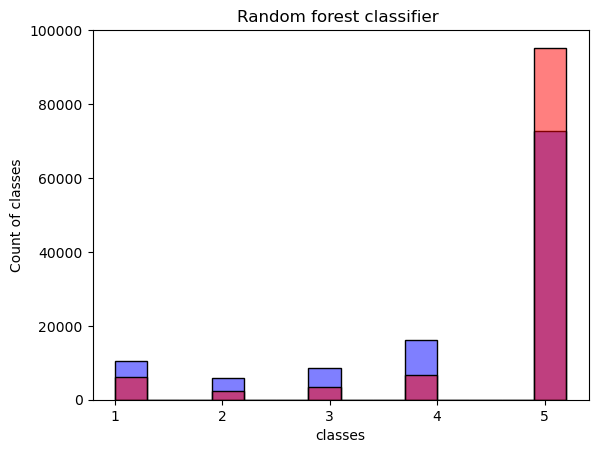

In [248]:
sns.histplot(Y_test,color='blue',alpha=0.5,binwidth = 0.3)
sns.histplot(rfc_ypred,color='red',alpha=0.5 , binwidth = 0.3)
plt.ylabel('Count of classes')
plt.xlabel('classes')
plt.title('Random forest classifier ')
plt.show()


In [250]:
con_max_rand = confusion_matrix(rfc_ypred , Y_test)

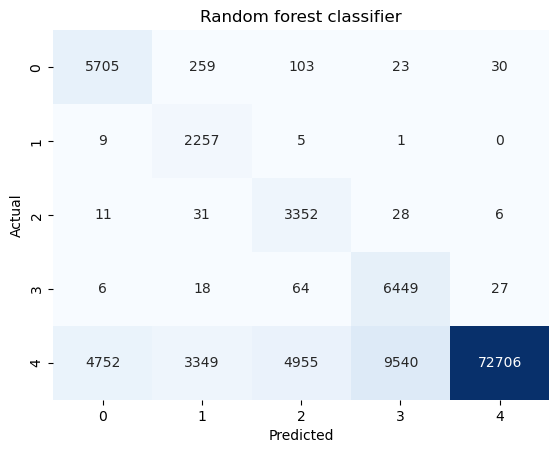

In [252]:
sns.heatmap(con_max_rand ,annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Random forest classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [255]:
sc_dict['Model'].append('RandomForest Classifier')

In [258]:
sc_dict['Score'].append(randomforest_ac)

### K nearest nighbhours classifier

In [261]:
from sklearn.neighbors import KNeighborsClassifier

In [262]:
%%time

knnc = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p = 2)
knnc.fit(x_train_bow_model , Y_train)

Wall time: 677 ms


KNeighborsClassifier()

In [263]:
knnc.predict(x_test_bow_model)

array([5, 5, 4, ..., 5, 5, 5], dtype=int64)

In [264]:
knc_ypred = knnc.predict(x_test_bow_model)
knc_ypred

array([5, 5, 4, ..., 5, 5, 5], dtype=int64)

In [268]:
accuracy_score(Y_test , knc_ypred)

0.7213992927889098

In [269]:
knn_sc = (accuracy_score(Y_test , knc_ypred))
knn_sc

0.7213992927889098

In [270]:
knn_sc

0.7213992927889098

In [271]:
knn_df = pd.DataFrame({'Actuall' : Y_test , 'predicted': knc_ypred})

In [272]:
knn_df

,Actuall,predicted
238235,2,5
366377,5,5
404185,4,4
36771,5,5
426175,5,5
...,...,...
400265,5,5
396130,4,5
420200,5,5
282512,1,5


In [277]:
knn_c = pd.crosstab(Y_test , knc_ypred , colnames= ['Actual'] , rownames=['Predicted'])

In [278]:
knn_c

Actual,1,2,3,4,5
Predicted,,,,,
1,4187,295,282,386,5333
2,504,1782,245,336,3047
3,473,316,2716,664,4310
4,457,272,605,5602,9105
5,1029,558,828,2628,67726


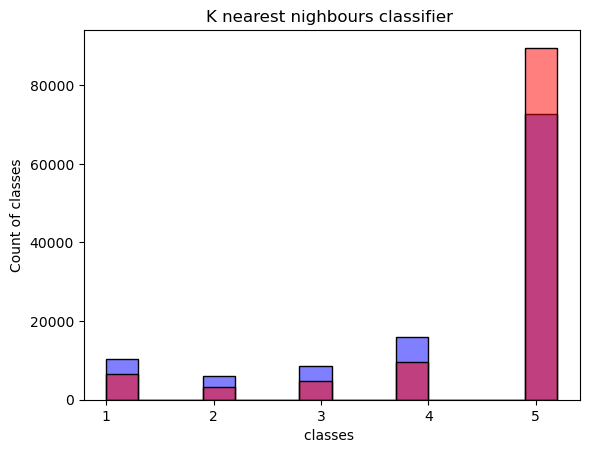

In [279]:
sns.histplot(Y_test,color='blue',alpha=0.5,binwidth = 0.3)
sns.histplot(knc_ypred,color='red',alpha=0.5,binwidth = 0.3)
plt.ylabel('Count of classes')
plt.xlabel('classes ')
plt.title('K nearest nighbours classifier ')
plt.show()

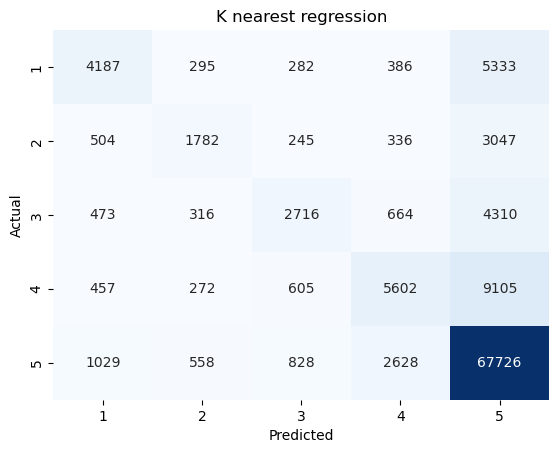

In [280]:
sns.heatmap(knn_c ,annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('K nearest regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [284]:
sc_dict['Model'].append('K-Nearest Nighbours')

In [286]:
sc_dict['Score'].append(knn_sc)

## Five Model Scores

In [292]:
Model_scores

,Model,Score
0,MultinomialNb classifier,0.749125
1,Decision Tree Classifier,0.764887
2,Logistic regression,0.770842
3,RandomForest Classifier,0.795780
4,K-Nearest Nighbours,0.721399


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


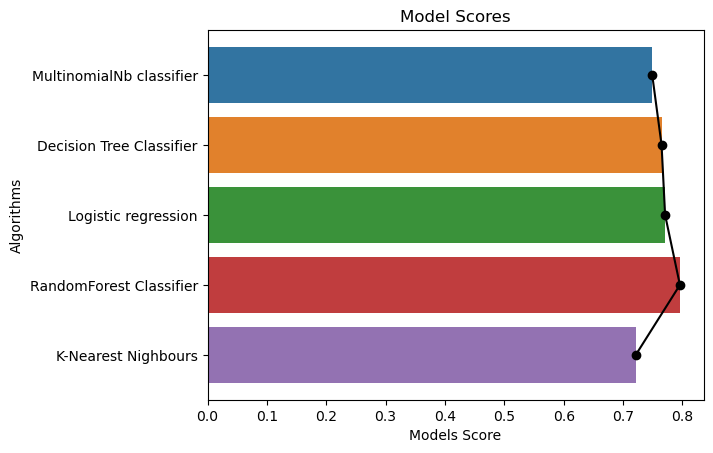

In [328]:
sns.barplot(Model_scores['Score'] , Model_scores['Model'])
plt.plot(Model_scores['Score'] ,Model_scores['Model'], marker='o', color='k', label='Line Plot')


plt.title('Model Scores')
plt.xlabel('Models Score')
plt.ylabel('Algorithms')
plt.show()